In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
file = "Unfälle_mit_Personenschaden.csv"
table_injuries = pd.read_csv(file, sep=';', 
                    header=[5], 
                    encoding='ISO-8859-1',
                    index_col=[0, 1, 2, 3],
                    engine='python',
                    skipfooter=3)
table_injuries = table_injuries.drop(columns='Unnamed: 4')
table_injuries = table_injuries.T.reset_index()
table_injuries.rename(columns={'index':'Jahr'}, inplace=True)
table_injuries.head()

Jahr                  Fahrunfall                                           \
                          innerorts                                            
                           Getötete                          Schwerverletzte   
        Unfälle mit Personenschaden Verunglückte Unfälle mit Personenschaden   
0  2008                         288          309                        6797   
1  2009                         294          317                        6719   
2  2010                         251          265                        5864   
3  2011                         244          262                        6459   
4  2012                         221          238                        6177   

                                                         \
                                                          
                           Leichtverletzte                
  Verunglückte Unfälle mit Personenschaden Verunglückte   
0         7419                       18293        22566   
1         7321                       18346        22197   
2         6432                       16825        20621   
3         7059                       16602        19985   
4         6707                       16626        20051   

                                                                        ...  \
                                           außerorts (ohne Autobahnen)  ...   
                    Insgesamt                                 Getötete  ...   
  Unfälle mit Personenschaden Verunglückte Unfälle mit Personenschaden  ...   
0                       25378        30294                        1169  ...   
1                       25359        29835                        1114  ...   
2                       22940        27318                         965  ...   
3                       23305        27306                        1073  ...   
4                       23024        26996                         894  ...   

                    Insgesamt                                           \
               auf Autobahnen                                Insgesamt   
                    Insgesamt                                 Getötete   
  Unfälle mit Personenschaden Verunglückte Unfälle mit Personenschaden   
0                       18269        28775                        4117   
1                       18394        28873                        3867   
2                       18829        29303                        3387   
3                       18290        29134                        3724   
4                       17847        28335                        3375   

                                                         \
                                                          
                           Schwerverletzte                
  Verunglückte Unfälle mit Personenschaden Verunglückte   
0         4477                       61912        70644   
1         4152                       59989        68567   
2         3648                       54483        62620   
3         4009                       60312        68985   
4         3600                       57929        66279   

                                                                        \
                                                                         
              Leichtverletzte                                Insgesamt   
  Unfälle mit Personenschaden Verunglückte Unfälle mit Personenschaden   
0                      254585       338403                      320614   
1                      246950       329104                      310806   
2                      230427       308550                      288297   
3                      242230       323380                      306266   
4                      238333       318099                      299637   

                
                
                
  Verunglückte  
0       413524  
1       401823  
2       374818  
3       396374  
4       387978  

[5 rows x 257 colu

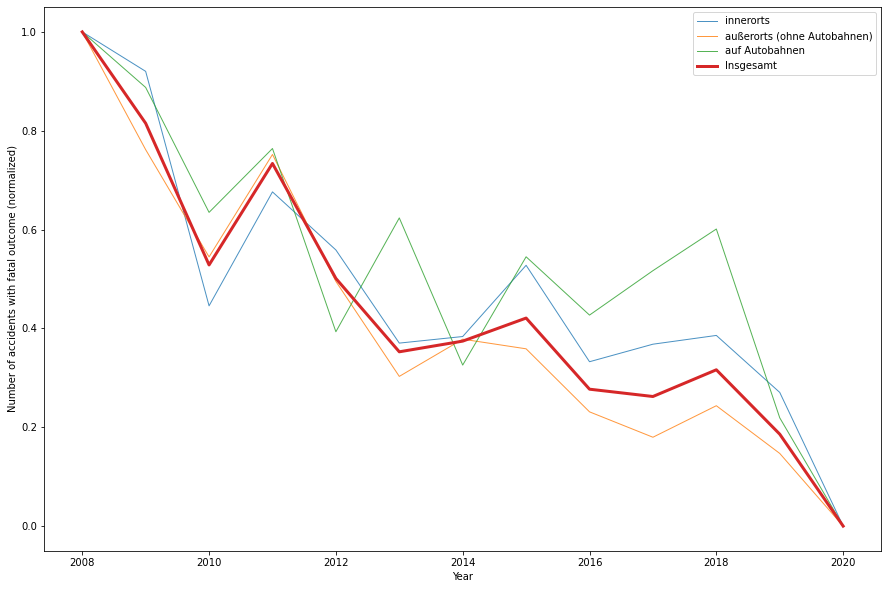

In [10]:
years = table_injuries['Jahr'].values.astype(int)

streets = ['innerorts', 'außerorts (ohne Autobahnen)', 'auf Autobahnen', 'Insgesamt']

plt.figure(figsize=(15, 10))
for street in streets:
    killed = table_injuries['Insgesamt', street, 'Getötete', 'Verunglückte'].astype(int)
    killed = (killed-killed.min())/(killed.max()-killed.min())

    if street == 'Insgesamt':
        plt.plot(years, killed, linewidth=3, alpha=1, label=street)
    else:
        plt.plot(years, killed, linewidth=1, alpha=0.8, label=street)
plt.xlabel('Year')
plt.ylabel('Number of accidents with fatal outcome (normalized)')
plt.legend()
# plt.title("People killed")
# plt.savefig("./imgs/people_killed.pdf", bbox_inches='tight') # save plot as pdf
plt.show()

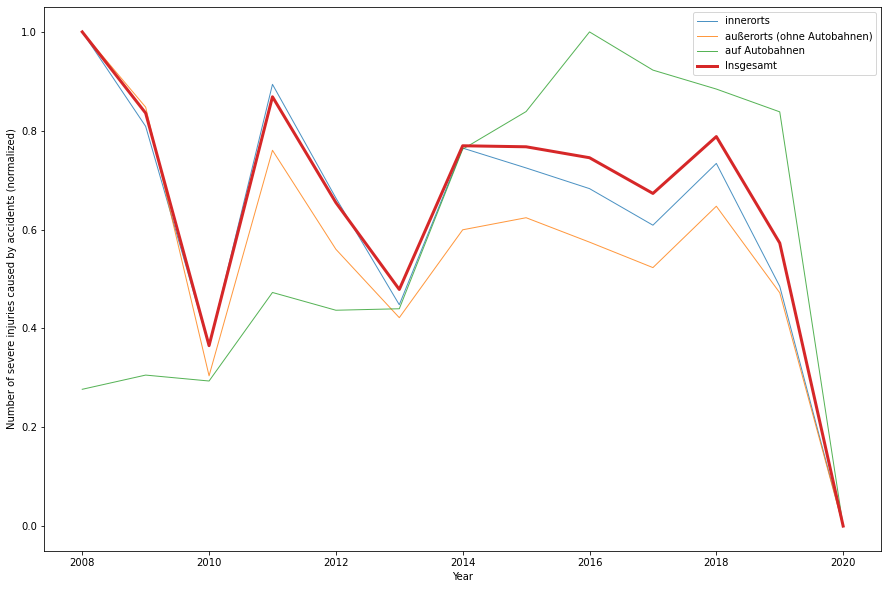

In [12]:
# ins = table['Insgesamt', 'Insgesamt', 'Schwerverletzte', 'Verunglückte'].astype(int)

plt.figure(figsize=(15, 10))
for street in streets:
    killed = table_injuries['Insgesamt', street, 'Schwerverletzte', 'Verunglückte'].astype(int)
    killed = (killed-killed.min())/(killed.max()-killed.min()) # min-max normalization

    if street == 'Insgesamt':
        plt.plot(years, killed, linewidth=3, alpha=1, label=street)
    else:
        plt.plot(years, killed, linewidth=1, alpha=0.8, label=street)
plt.xlabel('Year')
plt.ylabel('Number of severe injuries caused by accidents (normalized)')
plt.legend()
# plt.title("severely injured")
# plt.savefig("./imgs/severely_injured.pdf", bbox_inches='tight') # save plot as pdf
plt.show()